### File descriptions
- sales_train.csv - the training set. Daily historical data from January 2013 to October 2015. [2013년 1월 ~ 2015년 10월 일간데이터 훈련용]

- test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.[2015년 11월 가게,상품의 판매량을 예측]
- sample_submission.csv - a sample submission file in the correct format. [제출예제] - (shop_id, item_id) 별로 월간 판매량을 예측해야한다.


- items.csv - supplemental information about the items/products. [상품에 대한 추가정보]
- item_categories.csv  - supplemental information about the items categories. [상품 카테고리에 대한 추가정보]
- shops.csv- supplemental information about the shops. [가게에 대한 추가정보]

### Data fields
- ID - an Id that represents a (Shop, Item) tuple within the test set
- shop_id - unique identifier of a shop
- item_id - unique identifier of a product
- item_category_id - unique identifier of item category
- item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
- item_price - current price of an item
- date - date in format dd/mm/yyyy
- date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- item_name - name of item
- shop_name - name of shop
- item_category_name - name of item category
- This dataset is permitted to be used for any purpose, including commercial use.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

### 구글 코랩으로 하신분만 마운트 해주세요!

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
sales_train = pd.read_csv('/content/drive/MyDrive/sales_train.csv')
sales_test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [51]:
items = pd.read_csv('/content/drive/MyDrive/items.csv')
item_categories = pd.read_csv('/content/drive/MyDrive/item_categories.csv')
shops = pd.read_csv('/content/drive/MyDrive/shops.csv')

### 날짜 형식 변경

In [52]:
sales_train["date"] = sales_train["date"].apply(lambda x: datetime.strptime(x, '%d.%m.%Y'))

In [53]:
sales_train.sort_values("date", inplace = True)
sales_train.reset_index(drop=True, inplace = True)
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-01,0,18,5823,2500.0,1.0
1,2013-01-01,0,27,5573,849.0,1.0
2,2013-01-01,0,7,1006,399.0,1.0
3,2013-01-01,0,19,17707,899.0,1.0
4,2013-01-01,0,14,19548,149.0,1.0
...,...,...,...,...,...,...
2935844,2015-10-31,33,41,21386,169.0,1.0
2935845,2015-10-31,33,21,988,199.0,1.0
2935846,2015-10-31,33,41,21377,169.0,1.0
2935847,2015-10-31,33,22,10207,1199.0,1.0


### 결측값은 존재하지 않음 

In [54]:
sales_train.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [55]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


### 중복된 데이터가 있는지 확인한다! - 제거한다.
- 6개의 중복된 데이터가 존재한다.

In [56]:
duplicate = sales_train[sales_train.duplicated()]
duplicate

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
23142,2013-01-05,0,54,20130,149.0,1.0
1441022,2014-02-23,13,50,3423,999.0,1.0
1525377,2014-03-23,14,21,3423,999.0,1.0
1628996,2014-05-01,16,50,3423,999.0,1.0
1816729,2014-07-12,18,25,3423,999.0,1.0
2321620,2014-12-31,23,42,21619,499.0,1.0


In [57]:
sales_train.drop(duplicate.index, inplace = True) ## 제거한다.

### 이상치로 판단되는 것을 제거한다. - 제거안함!
- Kaggle의 평가기준을 확인해 보면 최종 결과값으로 (0, 20) 사이의 값므로 변환하여 제출 하라고 함. why? - 튀는 값들이 있는데 RMSE가 튀는 값들에 의해 커질 우려가 있어서 임의로 정한 것 같음
- 훈련시 부터 target 값들을 np.clip(target, 0, 20)으로 둔다면 이상치의 영향을 크게 받지 않을 것이라고 판단하여 

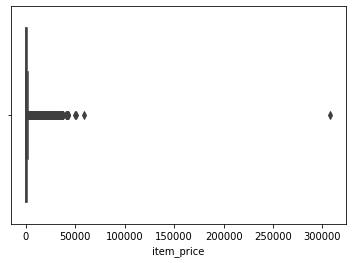

In [ ]:
import seaborn as sns
sns.boxplot(sales_train.item_price)

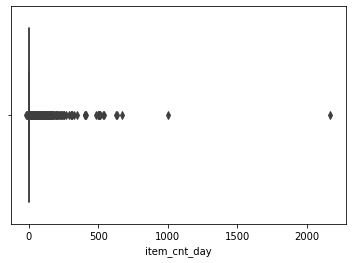

In [ ]:
import seaborn as sns
sns.boxplot(sales_train.item_cnt_day)

In [ ]:
# 이상치 제거 함수
def outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

#out_index1 = outlier(df=sales_train, column = "item_cnt_day",weight = 1.5)
#out_index2 = outlier(df=sales_train, column = "item_price",weight = 1.5)
#out_idx = set(out_index1).union(set(out_index2))

# 이상치를 제거한 데이터
#n1 = sales_train.drop(out_idx, axis=0)

In [ ]:
#out_index1 = outlier(df=sales_train, column = "item_cnt_day",weight = 3)
#out_index2 = outlier(df=sales_train, column = "item_price",weight = 3)
#out_idx = set(out_index1).union(set(out_index2))

In [ ]:
#print("item_cnt_day 이상치의 수:",len(out_index1))
#print("item_price 이상치의 수 :",len(out_index2))
#print("최종적으로 제거되는 이상치의 수 :", len(out_idx)) # 이상치로 판정되는 것들

item_cnt_day 이상치의 수: 306477
item_price 이상치의 수 : 78853
최종적으로 제거되는 이상치의 수 : 374314


In [ ]:
#sales_train.drop(out_idx, inplace = True)

### item_price와 item_cnt_day에 음수값이 존재한다.

In [58]:
len(sales_train[sales_train["item_price"] <= 0]) # 단 1개 존재

1

In [59]:
sales_train[sales_train["item_price"] <= 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
482092,2013-05-15,4,32,2973,-1.0,1.0


In [60]:
sales_train.drop([482092], inplace = True)

In [61]:
len(sales_train[sales_train["item_price"] <= 0])

0

### 팔린개수가 음수? 뭔 소린가? - 개수를 추정하는 것이므로 그대로 넣는것이 좋지 않을까?
- 해당 품목이 반품, 환불등으로 가게로 다시 돌아옴?
- 가게에서 품목을 주문한 것이 더 들어옴?
- 0으로 둔 모델 1
- 그냥 그대로 둔 모델 2

In [62]:
len(sales_train[sales_train["item_cnt_day"] < 0]) # 7356개 존재

7356

### test에는 존재하고, train에 존재하지 않는 shop을 확인.  - 없음

In [ ]:
set(sales_test.shop_id) - set(sales_train.shop_id)

set()

### test에는 존재하고, train에 존재하지 않는 Item_id를 확인.
- 전혀 훈련되지 않았던 값이므로 예측을 못하는 경우 발생 - 이것땜에 모델에서 예측을 잘못하는 경우 있음
- 해당 ID들을 처리해줄 필요가 있어보임. How? - 판매가 이루어지지 않았던 품목이므로 판매량을 0으로 주던지...

In [63]:
len(set(sales_test.item_id).difference(set(sales_train.item_id)))

363

### Grouping - ★ 
- test셋에만 있는 item_id를 train에 넣어줄 예정

In [64]:
grouped = sales_train.groupby(["date_block_num","shop_id","item_id"])
grouped = grouped.agg({'item_cnt_day':'sum'}).reset_index()

In [65]:
display(grouped)

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
1609119,33,59,22087,6.0
1609120,33,59,22088,2.0
1609121,33,59,22091,1.0
1609122,33,59,22100,1.0


### sales_test 데이터를 grouped와 유사하게 만든다.
- test셋에만 있는 item_id를 train에 넣어준다.

In [66]:
sales_test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [67]:
sales_test.columns = ["date_block_num", "shop_id", "item_id"]
sales_test["date_block_num"] = 34
sales_test.head()

,date_block_num,shop_id,item_id
0,34,5,5037
1,34,5,5320
2,34,5,5233
3,34,5,5232
4,34,5,5268


### test셋에만 있는 item_id를 train에 넣는 방법 실험 - 실행할 필요 X
1. date_block_num이 1인 데이터들에 대해 shop_id와 item_id를 추출한다. (block_num에 따라 변동될것임)
2. sales_test set에 대해 shop_id와 item_id를 추출 (고정)
3. shop_id와 item_id 기준으로 outer조인을 한다.
4. 중복된 값이 없는지 확인한다.

[데이터가 원래 것에 비해 많이 커진다.]

In [ ]:
y1 = grouped[grouped["date_block_num"] == 1]
y1 = y1[["shop_id", "item_id"]]
y1

,shop_id,item_id
63224,0,30
63225,0,31
63226,0,32
63227,0,33
63228,0,35
...,...,...
123154,59,22020
123155,59,22024
123156,59,22087
123157,59,22130


In [ ]:
y2 = sales_test[["shop_id", "item_id"]]
y2

,shop_id,item_id
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
...,...,...
214195,45,18454
214196,45,16188
214197,45,15757
214198,45,19648


In [ ]:
yy = pd.merge(y1, y2, on = ["shop_id", "item_id"], how = "outer")
yy.drop_duplicates(["shop_id", "item_id"]).sort_values(by = ["shop_id", "item_id"])

,shop_id,item_id
0,0,30
1,0,31
2,0,32
3,0,33
4,0,35
...,...,...
203149,59,22162
202405,59,22163
202824,59,22164
205811,59,22166


### 새로운 데이터 프레임을 만든다. - test셋의 item_id가 모두 포함되도록!
- training이 160만개 정도
- 모든 조합을 고려한다면 33 * 60 * 22170 = 4천만개 행이 만들어짐...(너무 많음)
- 각 shop_id, block_num을 기반으로 train item_id에 test item_id가 없는 것만 넣을수 있을까? - 11489568, 천만개 정도......
- 더 나은 방법이 있을까? (60개 전체에 대해 했는데 test에 존재하는 shop들만 포함?)

### 위에서 실험한 것  for문으로 돌림

In [68]:
ddf = []

In [69]:
st = sales_test[["shop_id", "item_id"]]

for i in range(0, 34):
    tmp = grouped[grouped["date_block_num"] == i]
    tmp = tmp[["shop_id", "item_id"]]
    
    yy = pd.merge(tmp, st, on = ["shop_id", "item_id"], how = "outer")
    tmp2 = np.array(yy.drop_duplicates(["shop_id", "item_id"]).sort_values(by = ["shop_id", "item_id"]))
    ddf.append(np.append(tmp2,np.repeat(i, len(tmp2)).reshape(len(tmp2), 1), axis = 1))

In [70]:
ddf[3]

array([[    2,    30,     3],
       [    2,    31,     3],
       [    2,    32,     3],
       ...,
       [   59, 22164,     3],
       [   59, 22166,     3],
       [   59, 22167,     3]])

### 총 8291765개로 데이터가 적지는 않다...

In [71]:
tot = 0
for i in range(0, 34):
      tot += len(ddf[i])
tot

8291765

In [72]:
n_save = pd.DataFrame()

In [73]:
for i in range(0, 34):
    n_tt = pd.DataFrame(ddf[i], columns = ["shop_id", "item_id", "date_block_num"])
    n_save = pd.concat([n_save, n_tt])

In [74]:
n_save = n_save.reset_index()
n_save.drop("index", axis = 1, inplace = True)
n_save = n_save[["date_block_num", "shop_id", "item_id"]]

In [75]:
n_save

,date_block_num,shop_id,item_id
0,0,0,32
1,0,0,33
2,0,0,35
3,0,0,43
4,0,0,51
...,...,...,...
8291760,33,59,22162
8291761,33,59,22163
8291762,33,59,22164
8291763,33,59,22166


### test_data와 합침 

In [76]:
f_data = pd.concat([n_save,sales_test])
f_data = f_data.reset_index()
f_data.drop("index", axis = 1, inplace = True)
f_data

,date_block_num,shop_id,item_id
0,0,0,32
1,0,0,33
2,0,0,35
3,0,0,43
4,0,0,51
...,...,...,...
8505960,34,45,18454
8505961,34,45,16188
8505962,34,45,15757
8505963,34,45,19648


In [77]:
f_data = pd.merge(f_data, grouped, on = ["date_block_num", "shop_id", "item_id"], how = "left")

In [78]:
f_data

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
8505960,34,45,18454,NaN
8505961,34,45,16188,NaN
8505962,34,45,15757,NaN
8505963,34,45,19648,NaN


### 나온 Null값들은 가격에 대한 정보가 없음.

In [79]:
f_data.isna().sum()

date_block_num          0
shop_id                 0
item_id                 0
item_cnt_day      6896841
dtype: int64

### Null을 0으로 채워줌

In [80]:
f_data = f_data.fillna(0)

### 최종형태

In [81]:
f_data

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
8505960,34,45,18454,0.0
8505961,34,45,16188,0.0
8505962,34,45,15757,0.0
8505963,34,45,19648,0.0


### 저장한다!

In [82]:
#f_data.to_csv('/content/drive/MyDrive/f_data.csv', index=False)

In [83]:
f_data = pd.read_csv('/content/drive/MyDrive/f_data.csv')
f_data.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


### item_category_id를 join함 - f_data이용해 봄

In [ ]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [84]:
grouped_data = f_data.merge(items, on = "item_id")
grouped_data.drop(["item_name"], axis = 1, inplace = True)

In [85]:
grouped_data

,date_block_num,shop_id,item_id,item_cnt_day,item_category_id
0,0,0,32,6.0,40
1,0,1,32,7.0,40
2,0,2,32,0.0,40
3,0,3,32,3.0,40
4,0,4,32,2.0,40
...,...,...,...,...,...
8505960,33,55,7126,1.0,31
8505961,33,55,7716,1.0,31
8505962,33,55,13092,1.0,36
8505963,33,55,16797,1.0,78


### grouped_data을 기반으로 하여  점점 더 살을 붙여가는 방향으로 전처리 시도

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## EDA 과정

### shops의 도시를 뽑아보자

In [ ]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


### 러시아어 -> 영어 번역 - selenium을 이용!

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/graphics-drive

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)

In [ ]:
url = "https://translate.google.co.kr/?hl=ko&sl=auto&tl=ko&op=translate"

driver.get(url)
driver.find_element_by_css_selector("#i13 > span.VfPpkd-YVzG2b").click() # 번역어를 영어로 클릭한다.

In [ ]:
crawled_txt = np.array([])

for x in shops.shop_name:

    trans = driver.find_element_by_css_selector('#yDmH0d > c-wiz > div > div.WFnNle > c-wiz > div.OlSOob > c-wiz > div.ccvoYb > div.AxqVh > div.OPPzxe > c-wiz.rm1UF.UnxENd > span > span > div > textarea')

    trans.send_keys(Keys.CONTROL, 'a')
    trans.send_keys(Keys.BACKSPACE)
    trans.send_keys(x)
    
    time.sleep(2.5)
    res = driver.find_element_by_css_selector("#yDmH0d > c-wiz > div > div.WFnNle > c-wiz > div.OlSOob > c-wiz > div.ccvoYb > div.AxqVh > div.OPPzxe > c-wiz.P6w8m.BDJ8fb > div.dePhmb > div > div.J0lOec > span.VIiyi > span > span").text
    crawled_txt = np.append(crawled_txt, np.array([res]))

In [ ]:
shops.shop_name = crawled_txt # 번역된 것으로 바꿔준다.

### 변환된 것을 확인할 수 있음. 

In [ ]:
shops.head()

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 fran",0
1,"! Yakutsk shopping center ""Central"" Fran",1
2,"Adygea shopping center ""Mega""",2
3,"Balashiha TRK ""October-Kinomir""",3
4,"Volzhsky shopping center ""Volga Mall""",4


In [ ]:
### 저장한다!
#shops.to_csv('/content/drive/MyDrive/shops_new.csv', index=False) 

### shop_city를 만든다.
- shops_new를 불러와서 사용한다!

In [ ]:
shops = pd.read_csv("/content/drive/MyDrive/shops_new.csv")

In [ ]:
shops.head()

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 fran",0
1,"! Yakutsk shopping center ""Central"" Fran",1
2,"Adygea shopping center ""Mega""",2
3,"Balashiha TRK ""October-Kinomir""",3
4,"Volzhsky shopping center ""Volga Mall""",4


In [ ]:
import re
shop_city = shops.shop_name.apply(lambda x: x.split(" ")[0])

In [ ]:
# 약간 이상한 것들 수동으로 수정
shop_city[0] = shop_city[1] = "Yakutsk"
shop_city = shop_city.apply(lambda x: x.capitalize())
np.sort(shop_city.unique())

array(['1c-online', 'Adygea', 'Balashiha', 'Chekhov', 'Exit', 'Himki',
       'Kaluga', 'Kazan', 'Kolo', 'Krasnoyarsk', 'Kursk', 'Moscow',
       'Mytishchi', 'N.novgorod', 'Novosibirsk', 'Omsk', 'Online',
       'Rostnone', 'Rostov', 'Rostovnadon', 'Samara', 'Sergiev', 'Spb',
       'Surgut', 'Tomsk', 'Tyumen', 'Ufa', 'Vologda', 'Volzhsky',
       'Voronezh', 'Voronež', 'Yakutsk', 'Yaroslavl', 'Zhukovsky'],
      dtype=object)

### shop_city 라벨인코딩?

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
oh = OneHotEncoder()

shops["shop_city"] = le.fit_transform(shop_city)
le.fit_transform(shop_city)

array([31, 31,  1,  2, 28, 27, 29, 29, 30,  4, 33, 33, 16,  7,  7,  6,  8,
        9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       13, 13, 14, 14, 15, 17, 18, 19, 22, 22, 20, 20, 21, 23, 24, 25, 25,
       25, 26, 26,  5,  0,  3, 31, 31, 32])

In [ ]:
grouped_data = grouped_data.merge(shops, on = "shop_id")
grouped_data.drop(["shop_name"], axis = 1, inplace = True)

In [ ]:
grouped_data

,date_block_num,shop_id,item_id,item_cnt_day,item_category_id,shop_city
0,0,0,32,6.0,40,31
1,1,0,32,10.0,40,31
2,0,0,33,3.0,37,31
3,1,0,33,3.0,37,31
4,0,0,35,1.0,40,31
...,...,...,...,...,...,...
8505960,33,20,21003,1.0,61,11
8505961,33,20,21008,5.0,61,11
8505962,33,20,21012,1.0,61,11
8505963,33,20,21047,1.0,61,11


### Item_categories이용 좀더 Rough하게 분류해본다.

In [ ]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


### 번역하기

In [ ]:
url = "https://translate.google.co.kr/?hl=ko&sl=auto&tl=ko&op=translate"

driver.get(url)
driver.find_element_by_css_selector("#i13 > span.VfPpkd-YVzG2b").click() # 번역어를 영어로 클릭한다.

In [ ]:
crawled_txt2 = np.array([])

for x in item_categories.item_category_name:

    trans = driver.find_element_by_css_selector('#yDmH0d > c-wiz > div > div.WFnNle > c-wiz > div.OlSOob > c-wiz > div.ccvoYb > div.AxqVh > div.OPPzxe > c-wiz.rm1UF.UnxENd > span > span > div > textarea')

    trans.send_keys(Keys.CONTROL, 'a')
    trans.send_keys(Keys.BACKSPACE)
    trans.send_keys(x)
    
    time.sleep(2.5)
    res2 = driver.find_element_by_css_selector("#yDmH0d > c-wiz > div > div.WFnNle > c-wiz > div.OlSOob > c-wiz > div.ccvoYb > div.AxqVh > div.OPPzxe > c-wiz.P6w8m.BDJ8fb > div.dePhmb > div > div.J0lOec > span.VIiyi > span > span").text
    crawled_txt2 = np.append(crawled_txt2, np.array([res2]))

In [ ]:
item_categories.item_category_name = crawled_txt2

In [ ]:
### 저장한다!
#item_categories.to_csv('/content/drive/MyDrive/item_categories_new.csv', index=False) 

### ' - '를 기준으로 분할 후 앞에것 뒤에 것으로 새로운 열을 만든다.

In [ ]:
item_categories = pd.read_csv("/content/drive/MyDrive/item_categories_new.csv")

In [ ]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Headset / Headphones,0
1,Accessories - PS2.,1
2,Accessories - PS3.,2
3,Accessories - PS4.,3
4,Accessories - PSP.,4


In [ ]:
import re
sub_category_1 = item_categories.item_category_name.apply(lambda x: x.split("-")[0])
sub_category_1 = sub_category_1.apply(lambda x: x.capitalize().strip())

sub_category_2 = item_categories.item_category_name.apply(lambda x: x.split("-")).apply(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
#sub_category_2 = sub_category_2.apply(lambda x: x.capitalize().strip())


In [ ]:
item_categories["sub_category_1"] = sub_category_1
item_categories["sub_category_2"] = sub_category_2

In [ ]:
item_categories

,item_category_name,item_category_id,sub_category_1,sub_category_2
0,PC - Headset / Headphones,0,Pc,Headset / Headphones
1,Accessories - PS2.,1,Accessories,PS2.
2,Accessories - PS3.,2,Accessories,PS3.
3,Accessories - PS4.,3,Accessories,PS4.
4,Accessories - PSP.,4,Accessories,PSP.
...,...,...,...,...
79,Service,79,Service,Service
80,Service - Tickets,80,Service,Tickets
81,Clean media (spire),81,Clean media (spire),Clean media (spire)
82,Clean media (piece),82,Clean media (piece),Clean media (piece)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
oh = OneHotEncoder()

item_categories["sub_category_1"] = le.fit_transform(item_categories["sub_category_1"])
item_categories["sub_category_2"] = le.fit_transform(item_categories["sub_category_2"])

In [ ]:
grouped_data= grouped_data.merge(item_categories, on = "item_category_id")
grouped_data.drop(["item_category_name"], axis = 1, inplace = True)

In [ ]:
grouped_data

,date_block_num,shop_id,item_id,item_cnt_day,item_category_id,shop_city,sub_category_1,sub_category_2
0,0,0,32,6.0,40,31,3,18
1,1,0,32,10.0,40,31,3,18
2,0,0,35,1.0,40,31,3,18
3,1,0,35,14.0,40,31,3,18
4,0,0,43,1.0,40,31,3,18
...,...,...,...,...,...,...,...,...
8505960,6,31,3761,1.0,18,11,7,33
8505961,27,35,6662,1.0,18,13,7,33
8505962,0,50,3315,1.0,18,25,7,33
8505963,3,26,6669,1.0,10,11,8,32


### 연도와 월을 추가

In [ ]:
grouped_data["month"] = grouped_data.date_block_num % 12 + 1

In [ ]:
grouped_data["year"] = 0

In [ ]:
grouped_data.year[grouped_data.date_block_num // 12 == 0] = 2013
grouped_data.year[grouped_data.date_block_num // 12 == 1] = 2014
grouped_data.year[grouped_data.date_block_num // 12 == 2] = 2015

In [ ]:
grouped_data

,date_block_num,shop_id,item_id,item_cnt_day,item_category_id,shop_city,sub_category_1,sub_category_2,month,year
0,0,0,32,6.0,40,31,3,18,1,2013
1,1,0,32,10.0,40,31,3,18,2,2013
2,0,0,35,1.0,40,31,3,18,1,2013
3,1,0,35,14.0,40,31,3,18,2,2013
4,0,0,43,1.0,40,31,3,18,1,2013
...,...,...,...,...,...,...,...,...,...,...
8505960,6,31,3761,1.0,18,11,7,33,7,2013
8505961,27,35,6662,1.0,18,13,7,33,4,2015
8505962,0,50,3315,1.0,18,25,7,33,1,2013
8505963,3,26,6669,1.0,10,11,8,32,4,2013


In [ ]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,01.01.2013,0,28,11613,1499.0,1.0
1,01.01.2013,0,51,10283,667.0,1.0
2,01.01.2013,0,19,2828,499.0,1.0
3,01.01.2013,0,51,10390,150.0,1.0
4,01.01.2013,0,51,10591,110.0,1.0
...,...,...,...,...,...,...
2935844,31.12.2014,23,10,15784,195.0,1.0
2935845,31.12.2014,23,31,18624,499.0,1.0
2935846,31.12.2014,23,31,18622,169.0,1.0
2935847,31.12.2014,23,59,9412,299.0,1.0


In [ ]:
# 저장하기
#grouped_data.to_csv('/content/drive/MyDrive/grouped_data.csv', index=False)

# START

In [30]:
# 이걸 쓰자!
grouped_data = pd.read_csv('/content/drive/MyDrive/grouped_data.csv')
grouped_data.head()

In [34]:
f_data = pd.read_csv('/content/drive/MyDrive/f_data.csv')
f_data.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


### 지난달 아이템 판매수량 추가 - item_cnt_lag1

In [31]:
dd = grouped_data[grouped_data["date_block_num"] != 0] # date_block_num = 0을 제외한 데이터

In [32]:
dd

,date_block_num,shop_id,item_id,item_cnt_day,item_category_id,shop_city,sub_category_1,sub_category_2,month,year
1,1,0,32,10.0,40,31,3,18,2,2013
3,1,0,35,14.0,40,31,3,18,2,2013
10,1,0,98,5.0,40,31,3,18,2,2013
12,1,0,947,2.0,40,31,3,18,2,2013
16,1,0,2462,2.0,40,31,3,18,2,2013
...,...,...,...,...,...,...,...,...,...,...
8505959,7,30,6723,1.0,18,11,7,33,8,2013
8505960,6,31,3761,1.0,18,11,7,33,7,2013
8505961,27,35,6662,1.0,18,13,7,33,4,2015
8505963,3,26,6669,1.0,10,11,8,32,4,2013


## f_data 원본에 영향을 주지 않는 변수 생성

In [88]:
kk = f_data
kk

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
8505960,34,45,18454,0.0
8505961,34,45,16188,0.0
8505962,34,45,15757,0.0
8505963,34,45,19648,0.0


In [89]:
kk["date_block_num"] += 1
kk.columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt_lag1']

In [90]:
kk # 생성완료

,date_block_num,shop_id,item_id,item_cnt_lag1
0,1,0,32,6.0
1,1,0,33,3.0
2,1,0,35,1.0
3,1,0,43,1.0
4,1,0,51,2.0
...,...,...,...,...
8505960,35,45,18454,0.0
8505961,35,45,16188,0.0
8505962,35,45,15757,0.0
8505963,35,45,19648,0.0


### 1달전 평균가를 넣어보기

In [91]:
sales_train = pd.read_csv('/content/drive/MyDrive/sales_train.csv')

In [92]:
t_tmp = sales_train.groupby(["date_block_num","shop_id","item_id"])
t_tmp = t_tmp.agg({"item_price" : "mean", 'item_cnt_day':'sum'}).reset_index()
t_tmp.drop("item_cnt_day",axis = 1 , inplace = True)
t_tmp["date_block_num"] += 1
t_tmp.columns = ['date_block_num', 'shop_id', 'item_id', 'item_price_lag1']
t_tmp

,date_block_num,shop_id,item_id,item_price_lag1
0,1,0,32,221.0
1,1,0,33,347.0
2,1,0,35,247.0
3,1,0,43,221.0
4,1,0,51,128.5
...,...,...,...,...
1609119,34,59,22087,119.0
1609120,34,59,22088,119.0
1609121,34,59,22091,179.0
1609122,34,59,22100,629.0


In [93]:
kk = pd.merge(kk, t_tmp, on = ["date_block_num","shop_id", "item_id"],how = "left")
kk

,date_block_num,shop_id,item_id,item_cnt_lag1,item_price_lag1
0,1,0,32,6.0,221.0
1,1,0,33,3.0,347.0
2,1,0,35,1.0,247.0
3,1,0,43,1.0,221.0
4,1,0,51,2.0,128.5
...,...,...,...,...,...
8505960,35,45,18454,0.0,NaN
8505961,35,45,16188,0.0,NaN
8505962,35,45,15757,0.0,NaN
8505963,35,45,19648,0.0,NaN


## date_block_num = 0을 제외한 데이터에 item_cnt_lag1,	item_price_lag1을 붙여준다.

In [94]:
n_dd = pd.merge(dd, kk, on = ["date_block_num","shop_id", "item_id"],how = "left")

In [95]:
n_dd

,date_block_num,shop_id,item_id,item_cnt_day,item_category_id,shop_city,sub_category_1,sub_category_2,month,year,item_cnt_lag1,item_price_lag1
0,1,0,32,10.0,40,31,3,18,2,2013,6.0,221.0
1,1,0,35,14.0,40,31,3,18,2,2013,1.0,247.0
2,1,0,98,5.0,40,31,3,18,2,2013,25.0,268.0
3,1,0,947,2.0,40,31,3,18,2,2013,2.0,37.0
4,1,0,2462,2.0,40,31,3,18,2,2013,1.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8236375,7,30,6723,1.0,18,11,7,33,8,2013,NaN,NaN
8236376,6,31,3761,1.0,18,11,7,33,7,2013,NaN,NaN
8236377,27,35,6662,1.0,18,13,7,33,4,2015,NaN,NaN
8236378,3,26,6669,1.0,10,11,8,32,4,2013,NaN,NaN


In [96]:
n_dd.isna().sum()

date_block_num            0
shop_id                   0
item_id                   0
item_cnt_day              0
item_category_id          0
shop_city                 0
sub_category_1            0
sub_category_2            0
month                     0
year                      0
item_cnt_lag1        572922
item_price_lag1     7255563
dtype: int64

In [97]:
n_dd = n_dd.fillna(0)
n_dd

,date_block_num,shop_id,item_id,item_cnt_day,item_category_id,shop_city,sub_category_1,sub_category_2,month,year,item_cnt_lag1,item_price_lag1
0,1,0,32,10.0,40,31,3,18,2,2013,6.0,221.0
1,1,0,35,14.0,40,31,3,18,2,2013,1.0,247.0
2,1,0,98,5.0,40,31,3,18,2,2013,25.0,268.0
3,1,0,947,2.0,40,31,3,18,2,2013,2.0,37.0
4,1,0,2462,2.0,40,31,3,18,2,2013,1.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8236375,7,30,6723,1.0,18,11,7,33,8,2013,0.0,0.0
8236376,6,31,3761,1.0,18,11,7,33,7,2013,0.0,0.0
8236377,27,35,6662,1.0,18,13,7,33,4,2015,0.0,0.0
8236378,3,26,6669,1.0,10,11,8,32,4,2013,0.0,0.0


## lag2
- 2개월전 자료 추가

In [98]:
kk["date_block_num"] += 1
kk.columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt_lag2', 'item_price_lag2']

In [99]:
kk

,date_block_num,shop_id,item_id,item_cnt_lag2,item_price_lag2
0,2,0,32,6.0,221.0
1,2,0,33,3.0,347.0
2,2,0,35,1.0,247.0
3,2,0,43,1.0,221.0
4,2,0,51,2.0,128.5
...,...,...,...,...,...
8505960,36,45,18454,0.0,NaN
8505961,36,45,16188,0.0,NaN
8505962,36,45,15757,0.0,NaN
8505963,36,45,19648,0.0,NaN


## n_dd에 두달전 자료를 합치기

In [100]:
n_dd = pd.merge(n_dd, kk, on = ["date_block_num","shop_id", "item_id"],how = "left")

In [101]:
n_dd = n_dd[n_dd.date_block_num > 1]
n_dd

,date_block_num,shop_id,item_id,item_cnt_day,item_category_id,shop_city,sub_category_1,sub_category_2,month,year,item_cnt_lag1,item_price_lag1,item_cnt_lag2,item_price_lag2
1356,2,2,32,0.0,40,1,3,18,3,2013,0.0,0.0,0.0,NaN
1357,3,2,32,0.0,40,1,3,18,4,2013,0.0,0.0,0.0,NaN
1358,4,2,32,0.0,40,1,3,18,5,2013,0.0,0.0,0.0,NaN
1359,5,2,32,0.0,40,1,3,18,6,2013,0.0,0.0,0.0,NaN
1360,6,2,32,0.0,40,1,3,18,7,2013,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236375,7,30,6723,1.0,18,11,7,33,8,2013,0.0,0.0,NaN,NaN
8236376,6,31,3761,1.0,18,11,7,33,7,2013,0.0,0.0,NaN,NaN
8236377,27,35,6662,1.0,18,13,7,33,4,2015,0.0,0.0,NaN,NaN
8236378,3,26,6669,1.0,10,11,8,32,4,2013,0.0,0.0,NaN,NaN


In [102]:
n_dd.isna().sum()

date_block_num            0
shop_id                   0
item_id                   0
item_cnt_day              0
item_category_id          0
shop_city                 0
sub_category_1            0
sub_category_2            0
month                     0
year                      0
item_cnt_lag1             0
item_price_lag1           0
item_cnt_lag2        577256
item_price_lag2     7074377
dtype: int64

In [103]:
n_dd = n_dd.fillna(0)
n_dd

,date_block_num,shop_id,item_id,item_cnt_day,item_category_id,shop_city,sub_category_1,sub_category_2,month,year,item_cnt_lag1,item_price_lag1,item_cnt_lag2,item_price_lag2
1356,2,2,32,0.0,40,1,3,18,3,2013,0.0,0.0,0.0,0.0
1357,3,2,32,0.0,40,1,3,18,4,2013,0.0,0.0,0.0,0.0
1358,4,2,32,0.0,40,1,3,18,5,2013,0.0,0.0,0.0,0.0
1359,5,2,32,0.0,40,1,3,18,6,2013,0.0,0.0,0.0,0.0
1360,6,2,32,0.0,40,1,3,18,7,2013,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236375,7,30,6723,1.0,18,11,7,33,8,2013,0.0,0.0,0.0,0.0
8236376,6,31,3761,1.0,18,11,7,33,7,2013,0.0,0.0,0.0,0.0
8236377,27,35,6662,1.0,18,13,7,33,4,2015,0.0,0.0,0.0,0.0
8236378,3,26,6669,1.0,10,11,8,32,4,2013,0.0,0.0,0.0,0.0


## 만든데이터셋 저장★★★★★★★★★★★★

In [104]:
# n_dd.to_csv('/content/drive/MyDrive/n_dataset.csv', index=False)

# Modeling
### 2013-01 ~ 2015-09 (date_block_num[0 ~ 32])으로 모델링하여 2015-11월 대상으로 예측 후 평가하는 방향
- lag1_cnt: 지난달의 개수를 추가 (13년도 1월 이전의 값은 없으므로 13/01데이터는 일단 제외한다.)
- 실제 train -> 2013/02 ~ 2015/09 [1 ~ 32]
- validation set -> 2015/10 [33]
- test set -> 2015/11 [34]

### 받은 데이터 셋으로 해보기!
- n_dd를 이용한다!


In [3]:
n_dd = pd.read_csv('/content/drive/MyDrive/n_dataset.csv')
n_dd.head()

,date_block_num,shop_id,item_id,item_cnt_day,item_category_id,shop_city,sub_category_1,sub_category_2,month,year,item_cnt_lag1,item_price_lag1,item_cnt_lag2,item_price_lag2
0,2,2,32,0.0,40,1,3,18,3,2013,0.0,0.0,0.0,0.0
1,3,2,32,0.0,40,1,3,18,4,2013,0.0,0.0,0.0,0.0
2,4,2,32,0.0,40,1,3,18,5,2013,0.0,0.0,0.0,0.0
3,5,2,32,0.0,40,1,3,18,6,2013,0.0,0.0,0.0,0.0
4,6,2,32,0.0,40,1,3,18,7,2013,0.0,0.0,0.0,0.0


In [4]:
X = n_dd.drop(["item_cnt_day"], axis = 1)
y = np.clip(n_dd.item_cnt_day, 0, 20) ## 중요!!

In [5]:
X_train = X[X["date_block_num"] <= 32]
y_train = y[X_train.index]

In [6]:
X_valid = X[X["date_block_num"] == 33]
y_valid = y[X_valid.index]

In [7]:
X_test = X[X["date_block_num"] == 34]
y_test = y[X_test.index]

In [8]:
X_train

,date_block_num,shop_id,item_id,item_category_id,shop_city,sub_category_1,sub_category_2,month,year,item_cnt_lag1,item_price_lag1,item_cnt_lag2,item_price_lag2
0,2,2,32,40,1,3,18,3,2013,0.0,0.0,0.0,0.0
1,3,2,32,40,1,3,18,4,2013,0.0,0.0,0.0,0.0
2,4,2,32,40,1,3,18,5,2013,0.0,0.0,0.0,0.0
3,5,2,32,40,1,3,18,6,2013,0.0,0.0,0.0,0.0
4,6,2,32,40,1,3,18,7,2013,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7970463,7,30,6723,18,11,7,33,8,2013,0.0,0.0,0.0,0.0
7970464,6,31,3761,18,11,7,33,7,2013,0.0,0.0,0.0,0.0
7970465,27,35,6662,18,13,7,33,4,2015,0.0,0.0,0.0,0.0
7970466,3,26,6669,10,11,8,32,4,2013,0.0,0.0,0.0,0.0


### Light GBM Regressor / Decision Tree Reressor / XGBoost Regressor 등
- https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html - 참고
- lightgbm.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=- 1, learning_rate=0.1, n_estimators=100,   subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1, silent=True, importance_type='split', **kwargs)

In [9]:
from lightgbm import LGBMRegressor
lgbm_r = LGBMRegressor(n_estimators = 300, max_depth = 8, learning_rate = 0.08,
                       early_stopping_round = 30, colsample_bytree = 0.7, subsample=0.7,
                       objective = 'rmse',
                       metric = 'rmse',
                       random_state = 42)

lgbm_r.fit(X_train,y_train, eval_set=[(X_valid, y_valid)], eval_metric='rmse',verbose = True)
y_pred = lgbm_r.predict(X_test)

[1]	valid_0's rmse: 1.16422
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's rmse: 1.14583
[3]	valid_0's rmse: 1.13172
[4]	valid_0's rmse: 1.12099
[5]	valid_0's rmse: 1.11064
[6]	valid_0's rmse: 1.09492
[7]	valid_0's rmse: 1.08194
[8]	valid_0's rmse: 1.07088
[9]	valid_0's rmse: 1.06512
[10]	valid_0's rmse: 1.05692
[11]	valid_0's rmse: 1.05268
[12]	valid_0's rmse: 1.04456
[13]	valid_0's rmse: 1.04131
[14]	valid_0's rmse: 1.03592
[15]	valid_0's rmse: 1.02725
[16]	valid_0's rmse: 1.02557
[17]	valid_0's rmse: 1.02391
[18]	valid_0's rmse: 1.01766
[19]	valid_0's rmse: 1.01616
[20]	valid_0's rmse: 1.01345
[21]	valid_0's rmse: 1.01129
[22]	valid_0's rmse: 1.00972
[23]	valid_0's rmse: 1.00843
[24]	valid_0's rmse: 1.00721
[25]	valid_0's rmse: 1.00274
[26]	valid_0's rmse: 1.00214
[27]	valid_0's rmse: 0.998601
[28]	valid_0's rmse: 0.998015
[29]	valid_0's rmse: 0.997344
[30]	valid_0's rmse: 0.996938
[31]	valid_0's rmse: 0.996858
[32]	valid_0's rmse: 0.996568
[33]	valid_0'

In [10]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE :", RMSE)

RMSE : 0.7574486861695228


## RMSE 변동과정

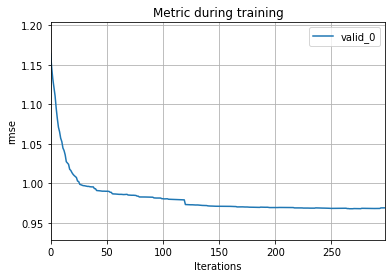

In [11]:
import lightgbm as lgb
lgb.plot_metric(lgbm_r)

### 교차검증을 시도해 본다 - Grouped K-Fold 를 이용한다.

In [12]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

In [13]:
rmse_set = []
for train_idx, test_idx in kf.split(X, y, groups = X.date_block_num):
    train_X, train_y = X.loc[train_idx], y.loc[train_idx]
    test_X, test_y = X.loc[test_idx], y.loc[test_idx]
    
    lgbm_r.fit(train_X,train_y, eval_set=[(X_valid, y_valid)], eval_metric='rmse',verbose = True)
    pred_y = lgbm_r.predict(test_X)
    rmse_set.append(np.sqrt(mean_squared_error(test_y, pred_y)))

[1]	valid_0's rmse: 1.16323
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's rmse: 1.1455
[3]	valid_0's rmse: 1.132
[4]	valid_0's rmse: 1.12192
[5]	valid_0's rmse: 1.11288
[6]	valid_0's rmse: 1.09702
[7]	valid_0's rmse: 1.08345
[8]	valid_0's rmse: 1.0721
[9]	valid_0's rmse: 1.06543
[10]	valid_0's rmse: 1.05706
[11]	valid_0's rmse: 1.05353
[12]	valid_0's rmse: 1.04227
[13]	valid_0's rmse: 1.03871
[14]	valid_0's rmse: 1.0292
[15]	valid_0's rmse: 1.02503
[16]	valid_0's rmse: 1.02278
[17]	valid_0's rmse: 1.02059
[18]	valid_0's rmse: 1.01856
[19]	valid_0's rmse: 1.0173
[20]	valid_0's rmse: 1.01481
[21]	valid_0's rmse: 1.01262
[22]	valid_0's rmse: 1.01078
[23]	valid_0's rmse: 1.00586
[24]	valid_0's rmse: 1.00432
[25]	valid_0's rmse: 1.00015
[26]	valid_0's rmse: 0.999448
[27]	valid_0's rmse: 0.998947
[28]	valid_0's rmse: 0.998095
[29]	valid_0's rmse: 0.997429
[30]	valid_0's rmse: 0.996839
[31]	valid_0's rmse: 0.996275
[32]	valid_0's rmse: 0.996095
[33]	valid_0's rms

In [14]:
print("평균 RMSE :",np.mean(rmse_set))

평균 RMSE : 1.057129789658154


In [15]:
rmse_set

[1.1512972119311689, 1.112827784561918, 0.9072643724813747]

### feature importance

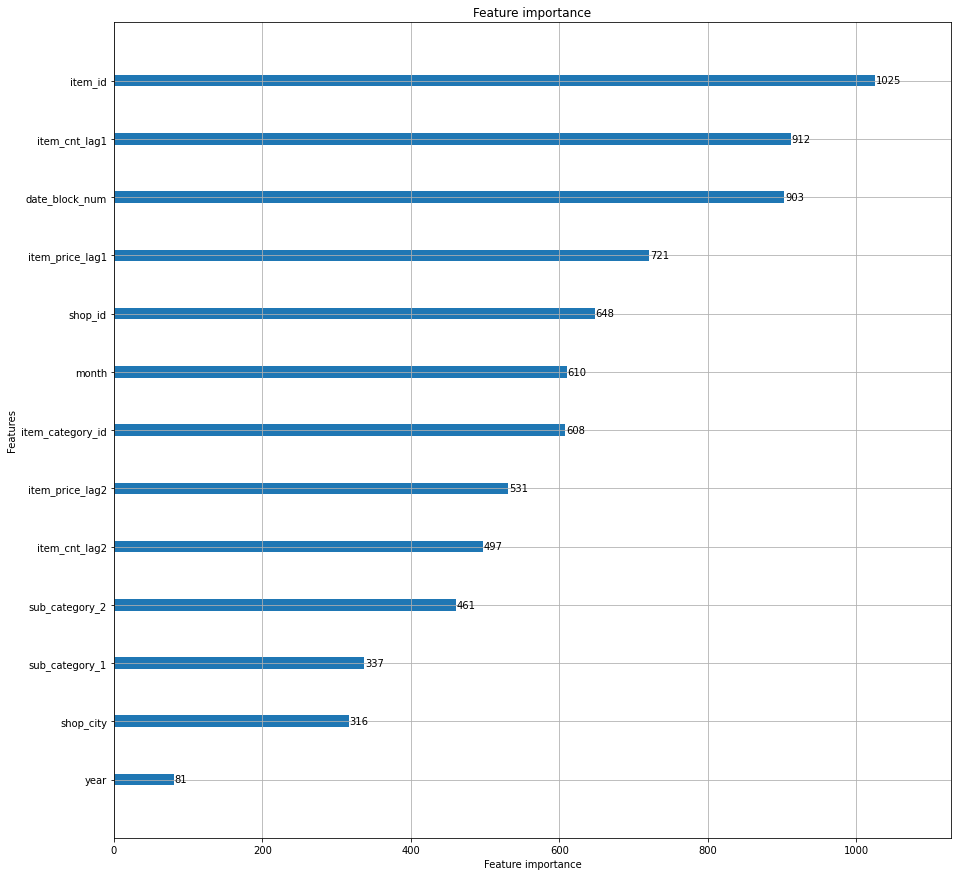

In [16]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(15, 15))
plot_importance(lgbm_r, ax=ax)

### Kaggle 제출방법

In [17]:
tt = pd.read_csv('/content/drive/MyDrive/test.csv')
tt

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [18]:
y_pred = np.clip(y_pred,0,20)

In [19]:
new = pd.concat([X_test.reset_index(), pd.DataFrame(y_pred, columns =["item_cnt_month"])],axis = 1)

In [20]:
submission = tt.merge(new, on = ["shop_id", "item_id"])[["ID","item_cnt_month"]]

In [21]:
submission

,ID,item_cnt_month
0,0,0.495192
1,1,0.131651
2,2,1.092706
3,3,0.302912
4,4,0.407871
...,...,...
214195,214195,0.406972
214196,214196,0.080488
214197,214197,0.096448
214198,214198,0.134142


### kaggle leader board score 1.00558정도

In [22]:
submission.to_csv('/content/drive/MyDrive/submission.csv', index=False, encoding='cp949') 

# Trash - 이 밑부터는 사용안함

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lgbm_r.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE :", RMSE)

RMSE : 14.427431631612777


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10,n_jobs=-1)
rfr.fit(X_train,y_train)

y_pred  = rfr.predict(X_test)

IndexError: list index out of range

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE :", RMSE)

RMSE : 17.409831607038456


### 시계열로 접근?
- 시계열 데이터가 AR의 특성을 띄는 경우, ACF는 천천히 감소하고 PACF는 처음 시차를 제외하고 급격히 감소한다.
- 반대로, MA의 특성을 띄는 경우 ACF는 급격히 감소하고 PACF는 천천히 감소한다.
- 급격히 감소하는 시차를 각 AR과 MA 모형의 모수(p, q)로 사용할 수 있다. 또한 데이터를 차분하여 ACF 및 PACF 계산함으로써 적절한 차분횟수까지 구할 수 있다

### Trash Bins

### 데이터가 너무 비대해짐 - 조정해야함!!!(이용X)

In [ ]:
import itertools
n_df = []
add = set(sales_test.item_id).difference(set(grouped.item_id)) # train에 한개도 없는 것들
len(add)
for i in range(0, 34):
    tmp = grouped[grouped.date_block_num == i]
    n_df.append(np.array(list(itertools.product([i], tmp.shop_id.unique(), tmp.item_id.unique()))))
save = pd.DataFrame()
for i in range(0, 34):
    tt = pd.DataFrame(n_df[i], columns = ["date_block_num", "shop_id", "item_id"])
    save = pd.concat([save, tt])
save = save.reset_index()
save.drop("index",axis = 1, inplace = True)

final_train = pd.concat([save,sales_test])
final_train = final_train.reset_index()
final_train.drop("index", axis = 1, inplace = True)
final_train

final_merge = pd.merge(final_train, grouped, on = ["date_block_num", "shop_id", "item_id"], how = "left")
final_merge.isna().sum()
final_merge

In [ ]:
save

,date_block_num,shop_id,item_id
0,0,0,32
1,0,0,33
2,0,0,35
3,0,0,43
4,0,0,51
...,...,...,...
10913845,33,59,5662
10913846,33,59,10068
10913847,33,59,12839
10913848,33,59,18275


### test데이터와 합침
- 나중에 date_block_num이 34인것만 골라서 test셋의 결과를 도출한다.

In [ ]:
final_train = pd.concat([save,sales_test])
final_train = final_train.reset_index()
final_train.drop("index", axis = 1, inplace = True)
final_train

final_merge = pd.merge(final_train, grouped, on = ["date_block_num", "shop_id", "item_id"], how = "left")
final_merge.isna().sum()
final_merge

NameError: name 'save' is not defined

In [ ]:
sales_train.groupby(["shop_id","item_id"]).mean()

date_block_num  item_price  item_cnt_day
shop_id item_id                                          
0       30             1.000000     265.000      3.444444
        31             1.000000     434.000      1.571429
        32             0.636364     221.000      1.454545
        33             0.500000     347.000      1.000000
        35             0.916667     247.000      1.250000
...                         ...         ...           ...
59      22154          0.000000     999.000      1.000000
        22155          6.000000     149.000      1.000000
        22162         25.937500     389.625      1.000000
        22164         26.666667     724.000      1.000000
        22167         12.000000     299.000      1.000000

[424124 rows x 3 columns]

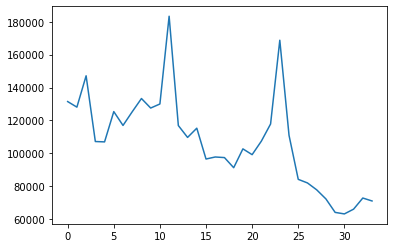

In [ ]:
tt = sales_train.groupby(["date_block_num"])["item_cnt_day"].sum()
plt.plot(tt)

In [ ]:
sales_train = sales_train.merge(items, on = "item_id")
sales_train.drop(["item_name"], axis = 1, inplace = True)

In [ ]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,2013-01-01,0,18,5823,2500.0,1.0,35
1,2013-01-01,0,54,5823,2499.5,1.0,35
2,2013-01-02,0,54,5823,2500.0,1.0,35
3,2013-01-02,0,42,5823,2490.0,1.0,35
4,2013-01-02,0,56,5823,2500.0,1.0,35
...,...,...,...,...,...,...,...
2935844,2015-10-31,33,55,6663,999.0,1.0,31
2935845,2015-10-31,33,6,9826,1549.0,1.0,58
2935846,2015-10-31,33,6,11905,2649.0,1.0,58
2935847,2015-10-31,33,6,7136,3599.0,1.0,24


<BarContainer object of 60 artists>

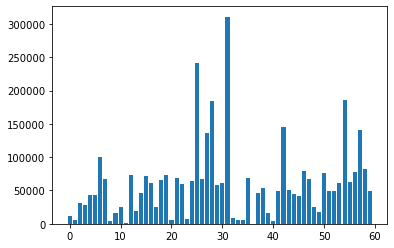

In [ ]:
import matplotlib.pyplot as plt
monthly_count = sales_train.groupby("shop_id").sum()["item_cnt_day"]
plt.bar(monthly_count.index,monthly_count)

In [ ]:
display(grouped)

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,shop_city
0,0,0,32,221.0,6.0,40,0
1,1,0,32,221.0,10.0,40,0
2,0,0,33,347.0,3.0,37,0
3,1,0,33,347.0,3.0,37,0
4,0,0,35,247.0,1.0,40,0
...,...,...,...,...,...,...,...
1609119,33,55,10204,399.0,16.0,31,28
1609120,33,55,12733,1490.0,2.0,76,28
1609121,33,55,13092,2000.0,1.0,36,28
1609122,33,55,16797,790.0,1.0,78,28


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

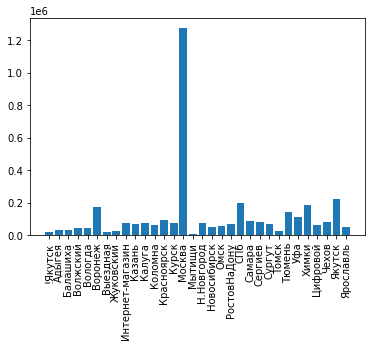

In [ ]:
monthly_count = sales_train.groupby("shop_city").sum()["item_cnt_day"]
plt.bar(monthly_count.index,monthly_count)
plt.xticks(rotation=90)